# Section 4.2 Single Model Visualizations

In [1]:
import os
import arviz as az
import pandas as pd
os.chdir(os.path.join("..))


## Activity: Calculate $\hat{R} and $S_{\text{eff}}$ for our previous analysis
Load each dataset and use ArviZ to calculate the plots for each of the datasets. For Effective Sample Size compare to the count of simulation samples to see how the two compare. Refer back to the traceplots and autocorrelation plots to see how the numerical diagnostics and visual diagnostics correlate.

We've copied one of the examples here for reference.

In [11]:
data = az.load_arviz_data(dataset="non_centered_eight")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c2849dac8>,
      dtype=object)

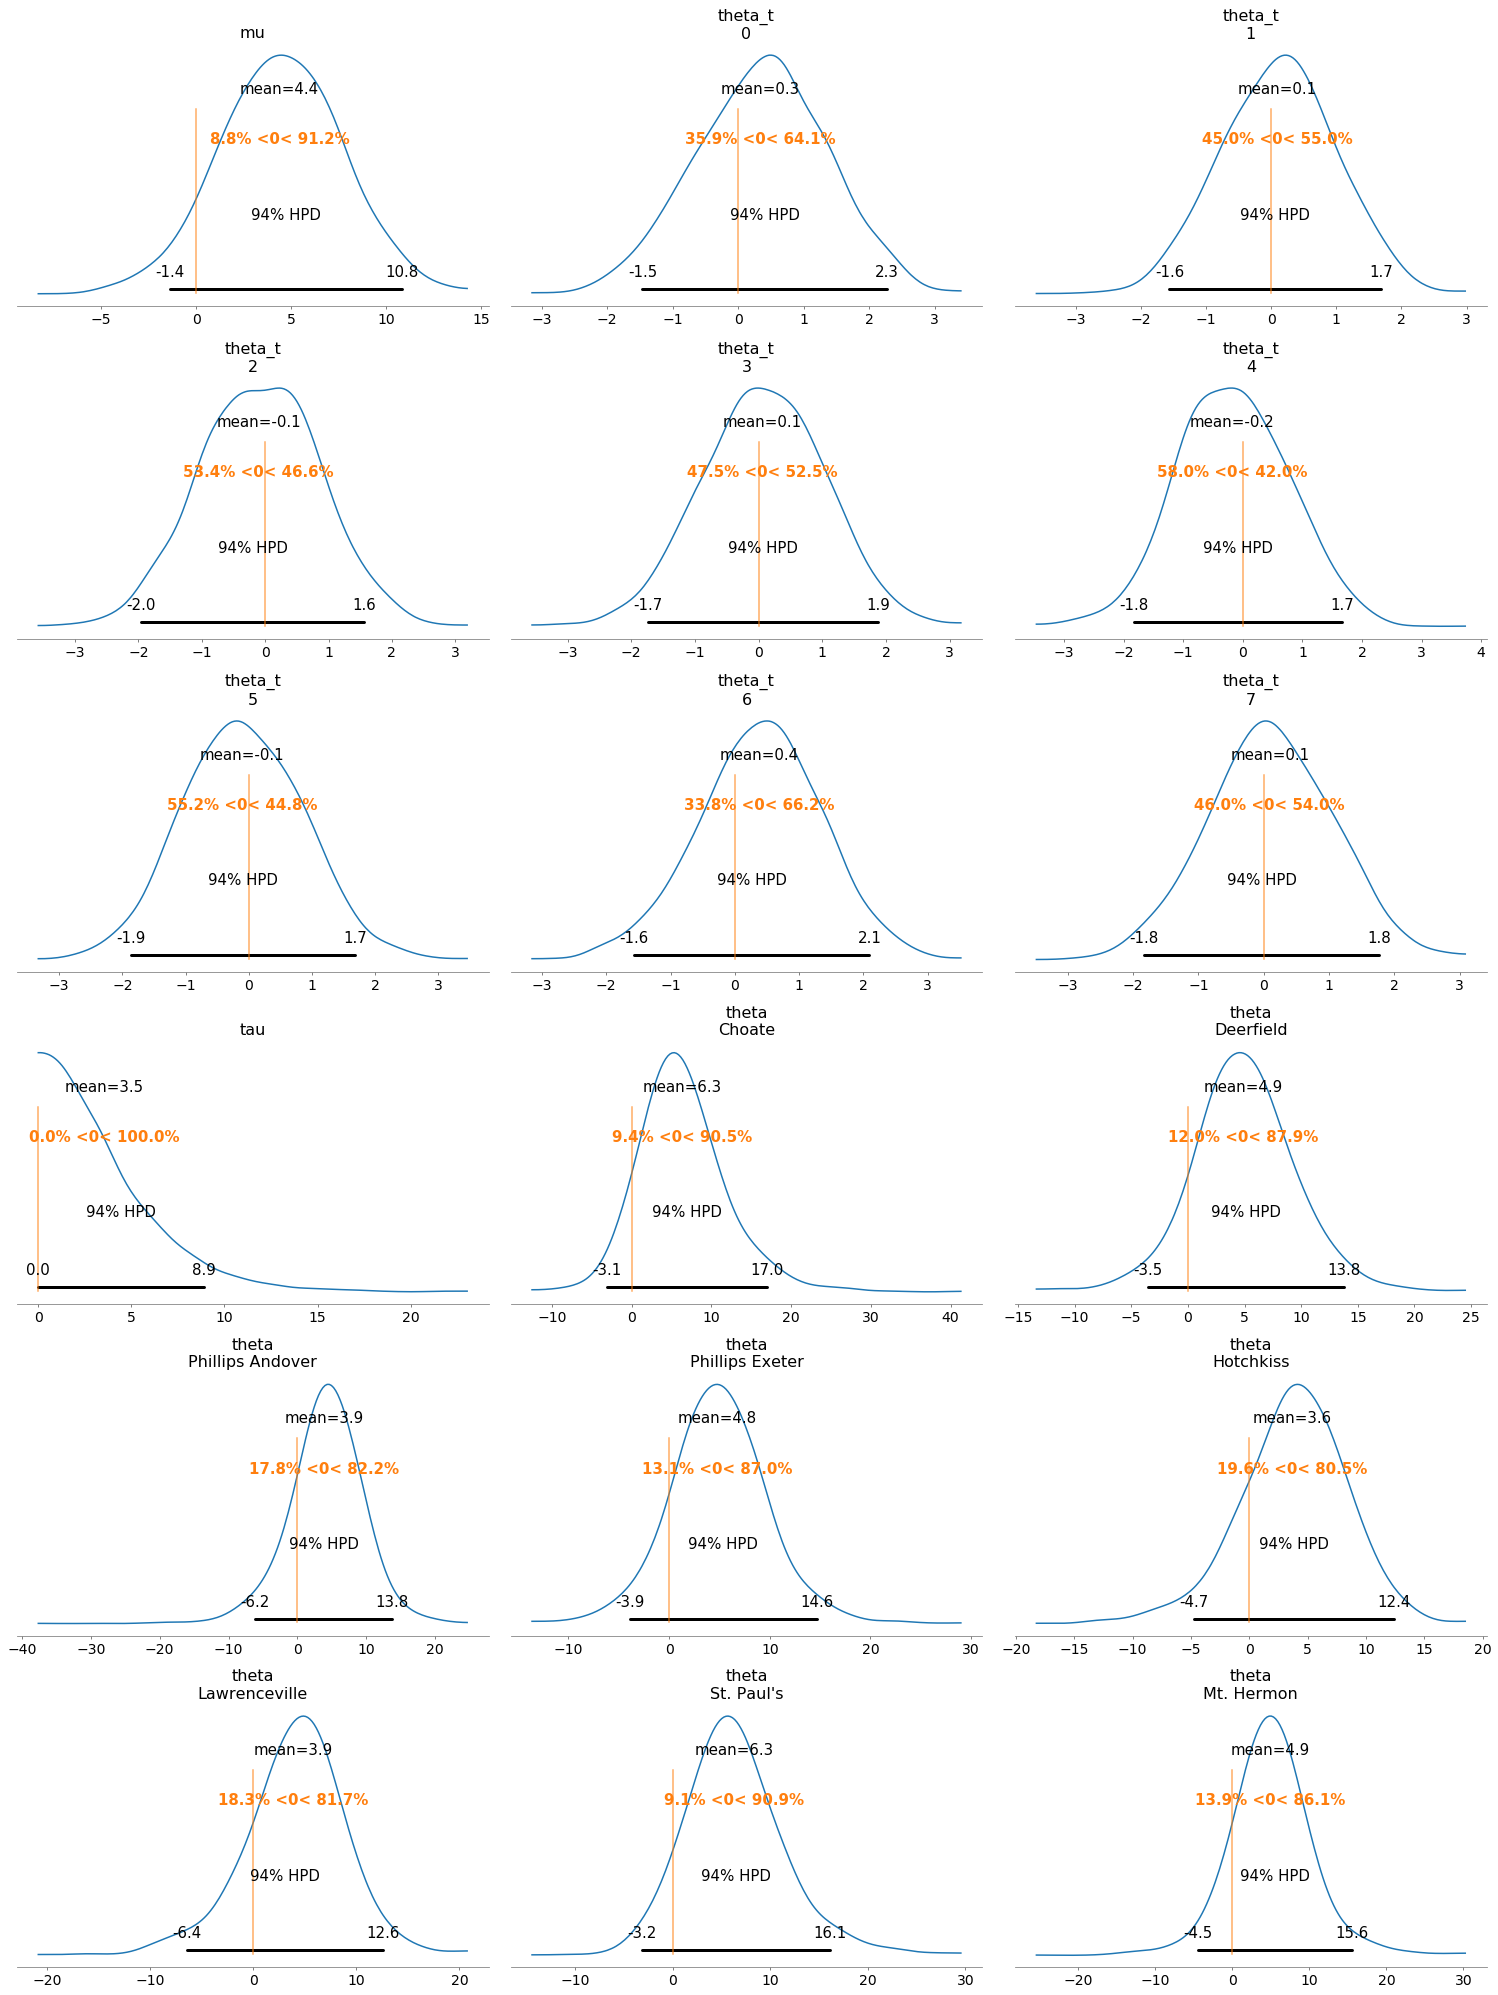

In [12]:
az.plot_posterior(data, ref_val=0)

### Example 1: data_bad_init.nc Numerical Diagnostics 

In [19]:
data_bad_init = az.from_netcdf(os.path.join(NETCDF_DIR, "data_bad_init.nc"))

In [20]:
# Rhat
az.rhat(data_bad_init)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    θ        float64 6.95

In [21]:
# Effective Sample Size
az.effective_sample_size(data_bad_init)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    θ        float64 1.0

In [22]:
coords = data_bad_init.posterior.coords
num_computational_draws = coords["draw"].shape[0] * coords["chain"].shape[0]
num_computational_draws 

402

### Exercise 2: data_good_init.nc Numerical Diagnostics

In [23]:
data_good_init = az.from_netcdf(os.path.join(NETCDF_DIR, "data_good_init.nc"))
az.rhat(data_good_init)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    θ        float64 1.11

In [24]:
az.effective_sample_size(data_good_init)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    θ        float64 12.0

In [25]:
coords = data_good_init.posterior.coords
num_computational_draws = coords["draw"].shape[0] * coords["chain"].shape[0]
num_computational_draws 

402

### Exercise 3: data_good_init_long_chain.nc Numerical Diagnostics

In [26]:
data_good_init_long_chain = az.from_netcdf(os.path.join(NETCDF_DIR, "data_good_init_long_chain.nc"))
az.rhat(data_good_init_long_chain)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    θ        float64 1.0

In [27]:
az.effective_sample_size(data_good_init_long_chain)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    θ        float64 2.421e+03

In [28]:
coords = data_good_init_long_chain.posterior.coords
num_computational_draws = coords["draw"].shape[0] * coords["chain"].shape[0]
num_computational_draws 

40002

### Exercise 4: data_tuned_mh.nc Numerical Diagnostics

In [29]:
data_tuned_mh = az.from_netcdf(os.path.join(NETCDF_DIR, "data_tuned_mh.nc"))
az.rhat(data_tuned_mh)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    θ        float64 1.0

In [30]:
az.effective_sample_size(data_tuned_mh)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    θ        float64 1.046e+03

In [31]:
coords = data_tuned_mh.posterior.coords
num_computational_draws = coords["draw"].shape[0] * coords["chain"].shape[0]
num_computational_draws 

10000

### Exercise 5: data_hmc.nc Numerical Diagnostics

In [32]:
data_hmc = az.from_netcdf(os.path.join(NETCDF_DIR, "data_hmc.nc"))
az.rhat(data_hmc)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    θ        float64 1.0

In [33]:
az.effective_sample_size(data_hmc)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    θ        float64 1.895e+03

In [34]:
coords = data_hmc.posterior.coords
num_computational_draws = coords["draw"].shape[0] * coords["chain"].shape[0]
num_computational_draws 

4000

### Exercise 6: Discussion about numerical diagnostics
Turn to your partner and discuss the results of the numerical diagnostics. 
* Do the numerical diagnostics correlate with your knowledge of MCMC theory?
* Do the diagnostics match your expectation to measuring covergence (mixing) and effective sample size?